In [1]:
# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import math

print(tf.__version__)

2.5.0


In [2]:
# define constants
batch_size = 128
epochs = 100
num_classes = 10

In [3]:
# download MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
len(train_images), len(test_images)

(60000, 10000)

In [5]:
# normalize the input image so that each pixel value is between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
# define the model architecture
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


469/469 [==============================] - 4s 2ms/step - loss: 0.3527 - accuracy: 0.9029
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1572 - accuracy: 0.9549
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1141 - accuracy: 0.9666
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0886 - accuracy: 0.9743
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0712 - accuracy: 0.9795
Epoch 6/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0596 - accuracy: 0.9826
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0494 - accuracy: 0.9858
Epoch 8/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0417 - accuracy: 0.9881
Epoch 9/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0353 - accuracy: 0.9903
Epoch 10/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0298 - accuracy: 0.9926
E

In [8]:
# evaluate the model using test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy: ", test_acc)

 58/313 [====>.........................] - ETA: 0s - loss: 0.1808 - accuracy: 0.9736

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


313/313 [==============================] - 1s 2ms/step - loss: 0.1402 - accuracy: 0.9793
Test Accuracy:  0.9793000221252441


In [24]:
# Helper function to display digit images
def show_sample(images, labels, sample_count=25):
  # Create a square with can fit {sample_count} images
  grid_count = math.ceil(math.ceil(math.sqrt(sample_count)))
  grid_count = min(grid_count, len(images), len(labels))
  
  plt.figure(figsize=(2*grid_count, 2*grid_count))
  for i in range(sample_count):
    plt.subplot(grid_count, grid_count, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.gray)
    plt.xlabel(labels[i])
  plt.show()

# Helper function to display digit images
def show_sample_digit(images, labels, digit, sample_count=25):
  # Create a square with can fit {sample_count} images
  grid_count = math.ceil(math.ceil(math.sqrt(sample_count)))
  grid_count = min(grid_count, len(images), len(labels))
  
  plt.figure(figsize=(2*grid_count, 2*grid_count))
  i = 0
  digit_count = 0
  while digit_count < sample_count:
    i += 1
    if (digit == labels[i]):
      plt.subplot(grid_count, grid_count, digit_count+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(images[i], cmap=plt.cm.gray)
      plt.xlabel(labels[i])
      digit_count += 1
  plt.show()

# Helper function to display digit images
def show_digit_image(image):
  # dram digit image
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  # major ticks every 20, minor ticks every 5
  major_ticks = np.arange(0, 29, 5)
  minor_ticks = np.arange(0, 29, 1)
  ax.set_xticks(major_ticks)
  ax.set_xticks(minor_ticks, minor=True)
  ax.set_yticks(major_ticks)
  ax.set_yticks(minor_ticks, minor=True)
  # and a correspoding grid
  ax.grid(which='both')
  # or if you want different settings for the grids
  ax.grid(which='minor', alpha=0.2)
  ax.grid(which='major', alpha=0.5)
  ax.imshow(image, cmap=plt.cm.binary)

  plt.show()

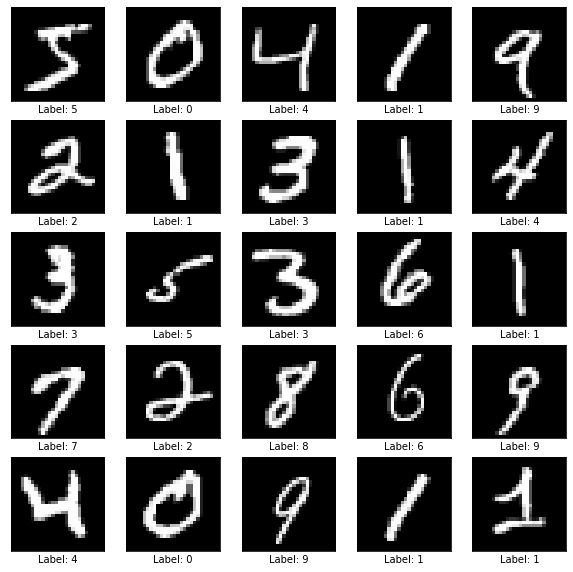

In [25]:
# show the first 25 images
show_sample(train_images, ['Label: %s' % label for label in train_labels])

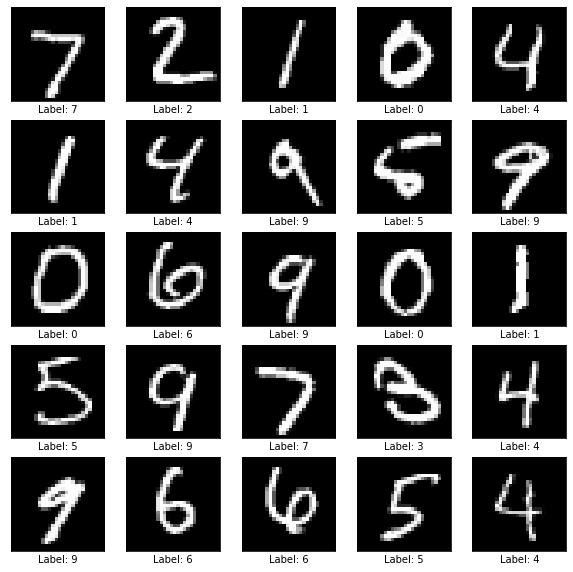

In [27]:
# show the first 25 images
show_sample(test_images, ['Label: %s' % label for label in test_labels])

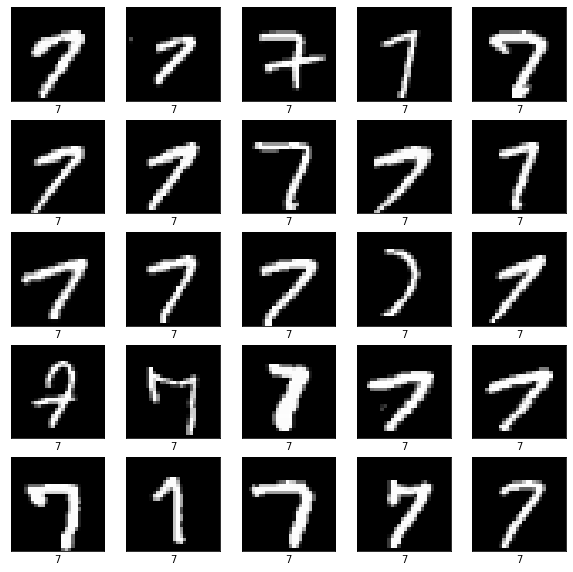

In [28]:
# show digit 7 the first 25 images
show_sample_digit(train_images, train_labels, 7)

Text(0, 0.5, 'accuracy')

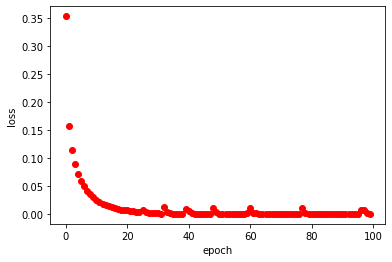

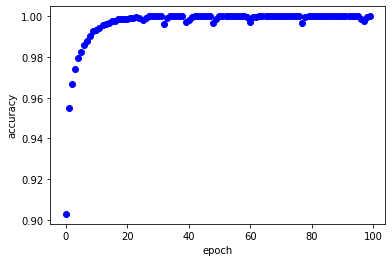

In [29]:
# evaluate the model using test dataset - show performance
fig, loss_ax = plt.subplots()
fig, acc_ax = plt.subplots()

loss_ax.plot(history.history['loss'], 'ro')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax.plot(history.history['accuracy'], 'bo')
acc_ax.set_xlabel('epoch')
acc_ax.set_ylabel('accuracy')


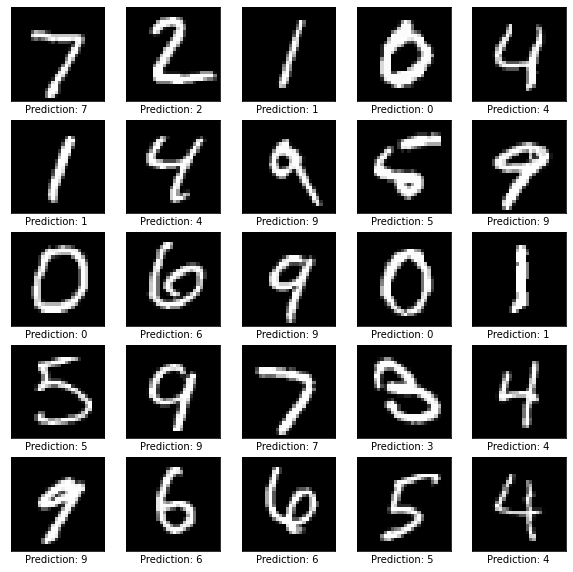

In [30]:
# predict the labels of digit images in our test dataset
predictions = model.predict(test_images)

# then plot the first 25 test images and their predicted labels
show_sample(test_images, ['Prediction: %d ' % np.argmax(result) for result in predictions])

Number is :  7 


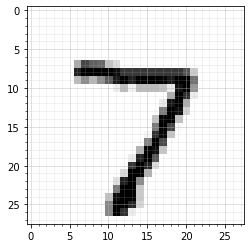

In [31]:
digit = 1 #@param {type:"slider", min:1, max:10000, step:1}
selected_digit = digit - 1

result = predictions[selected_digit]
result_number = np.argmax(result)
print("Number is : %2d " % result_number)

show_digit_image(test_images[selected_digit])